In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("Brain_Tumor_Prediction_Dataset.csv")
df.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Age,Gender,Country,Tumor_Size,Tumor_Location,MRI_Findings,Genetic_Risk,...,Chronic_Illness,Blood_Pressure,Diabetes,Tumor_Type,Treatment_Received,Survival_Rate(%),Tumor_Growth_Rate,Family_History,Symptom_Severity,Brain_Tumor_Present
0,0,0,0,66,Other,China,8.70,Cerebellum,Severe,81,...,Yes,122/88,No,Malignant,Other,58,Slow,Yes,Mild,No
1,1,1,1,87,Female,Australia,8.14,Temporal,Normal,65,...,No,126/119,No,Malignant,Other,13,Rapid,Yes,Severe,No
2,2,2,2,41,Male,Canada,6.02,Occipital,Severe,100,...,No,118/65,No,Benign,Chemotherapy,67,Slow,Yes,Moderate,Yes
3,3,3,3,52,Male,Japan,7.26,Occipital,Normal,19,...,No,165/119,Yes,Benign,Radiation,85,Moderate,No,Moderate,Yes
4,4,4,4,84,Female,Brazil,7.94,Temporal,Abnormal,47,...,Yes,156/97,Yes,Malignant,Other,17,Moderate,No,Moderate,No


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0.2         250000 non-null  int64  
 1   Unnamed: 0.1         250000 non-null  int64  
 2   Unnamed: 0           250000 non-null  int64  
 3   Age                  250000 non-null  int64  
 4   Gender               250000 non-null  object 
 5   Country              250000 non-null  object 
 6   Tumor_Size           250000 non-null  float64
 7   Tumor_Location       250000 non-null  object 
 8   MRI_Findings         250000 non-null  object 
 9   Genetic_Risk         250000 non-null  int64  
 10  Smoking_History      250000 non-null  object 
 11  Alcohol_Consumption  250000 non-null  object 
 12  Radiation_Exposure   250000 non-null  object 
 13  Head_Injury_History  250000 non-null  object 
 14  Chronic_Illness      250000 non-null  object 
 15  Blood_Pressure   

In [3]:
df.isnull().sum().sum()

np.int64(0)

In [4]:
df["Treatment_Received"]=df["Treatment_Received"].replace(["", " "], "Other").fillna("Other")
df["Treatment_Received"]=df["Treatment_Received"].astype("str")

In [5]:
df.to_csv("Brain_Tumor_Prediction_Dataset.csv")

In [6]:
df.describe()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Age,Tumor_Size,Genetic_Risk,Survival_Rate(%)
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,124999.500000,124999.500000,124999.500000,46.962424,5.251768,49.998916,54.481532
std,72168.927986,72168.927986,72168.927986,24.517143,2.742576,29.178031,25.999932
min,0.000000,0.000000,0.000000,5.000000,0.500000,0.000000,10.000000
25%,62499.750000,62499.750000,62499.750000,26.000000,2.870000,25.000000,32.000000
50%,124999.500000,124999.500000,124999.500000,47.000000,5.260000,50.000000,55.000000
75%,187499.250000,187499.250000,187499.250000,68.000000,7.630000,75.000000,77.000000
max,249999.000000,249999.000000,249999.000000,89.000000,10.000000,100.000000,99.000000


# Barplot for Country by All Numerical Values

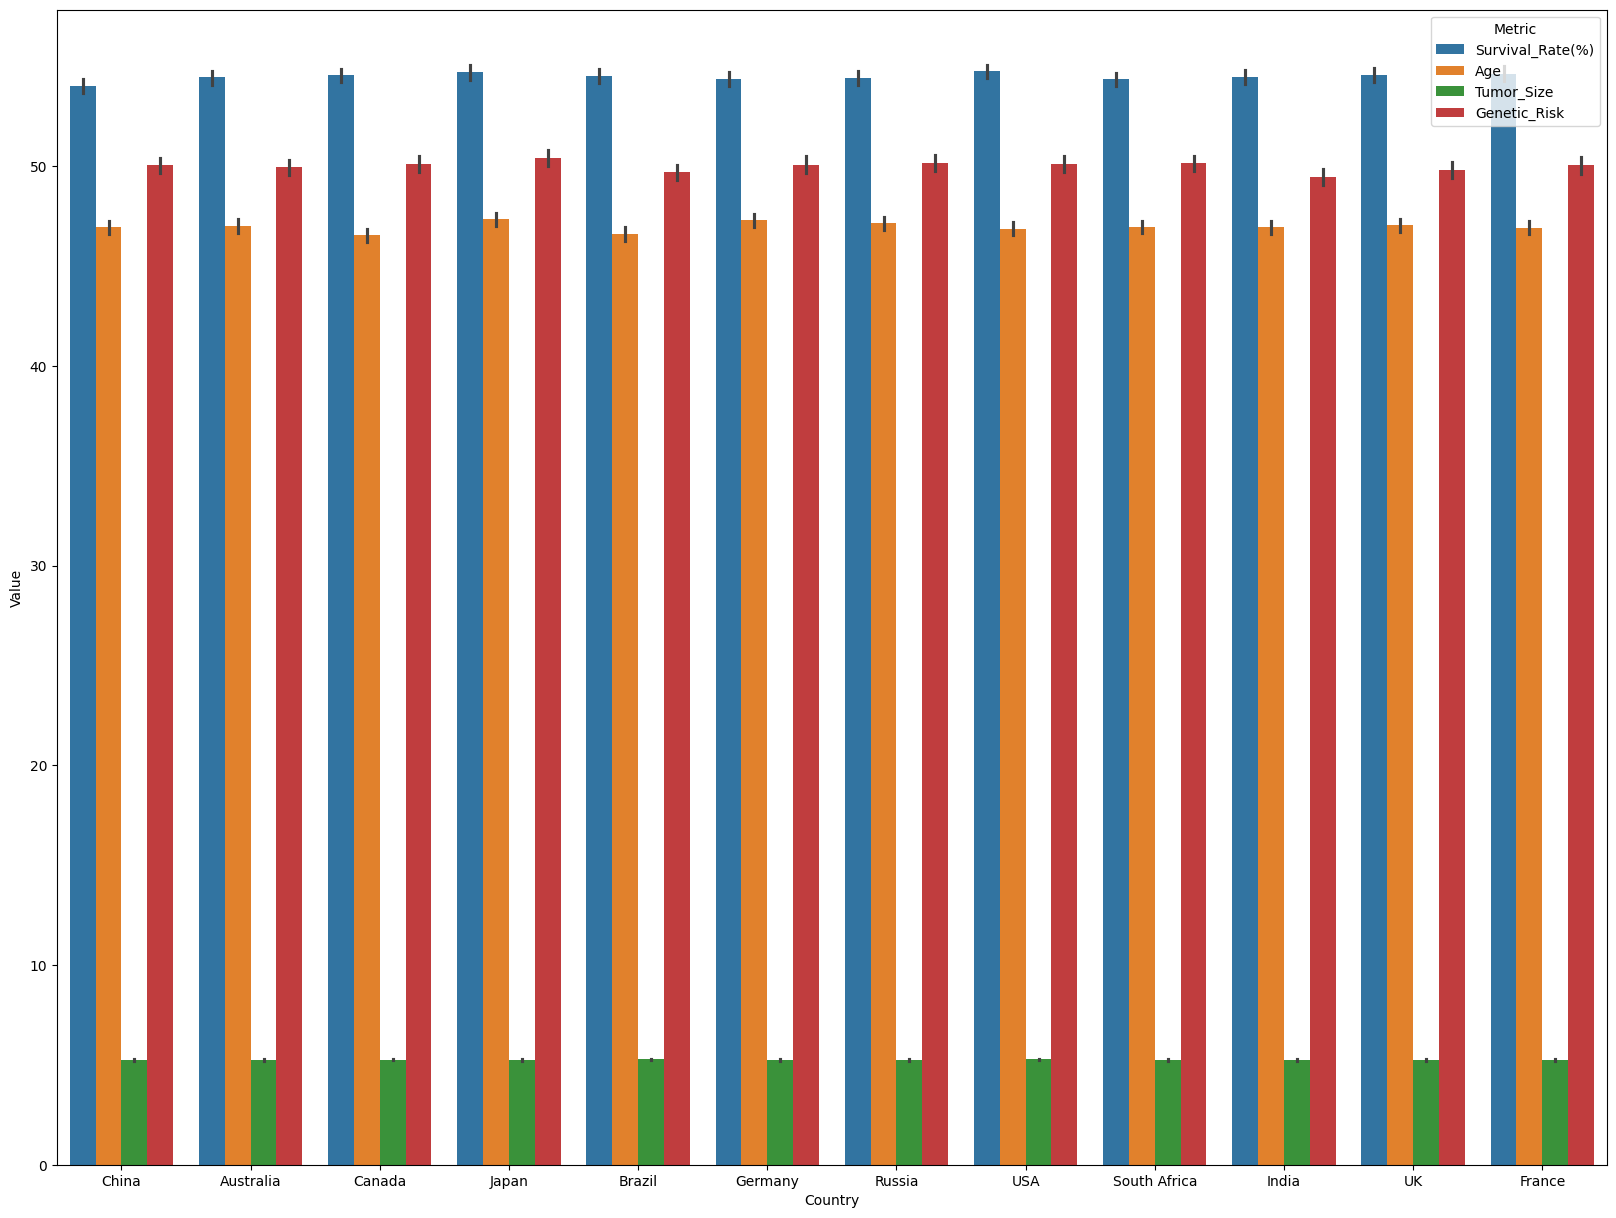

In [7]:
df_melted = pd.melt(df, id_vars=["Country"], value_vars=["Survival_Rate(%)", "Age", "Tumor_Size", "Genetic_Risk"], 
                    var_name="Metric", value_name="Value")

# Now, plotting
plt.figure(figsize=(20, 15))
sns.barplot(x="Country", y="Value", data=df_melted, hue="Metric")
plt.show()

# Barplot for Gender by All Numerical Values

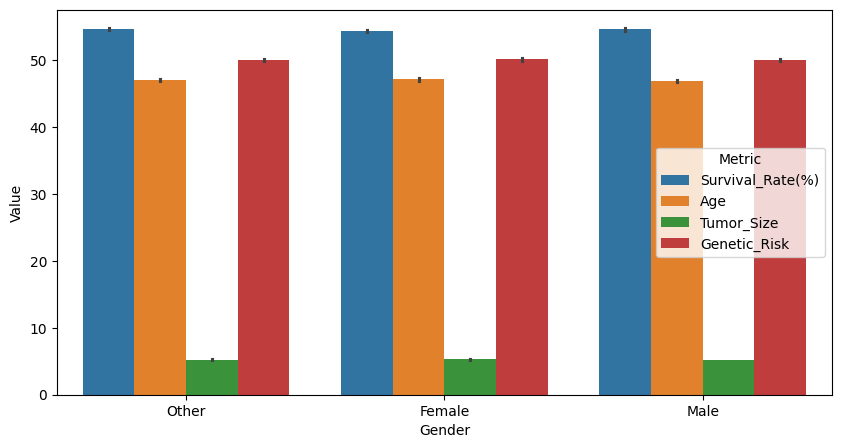

In [8]:
df_melted = pd.melt(df, id_vars=["Gender"], value_vars=["Survival_Rate(%)", "Age", "Tumor_Size", "Genetic_Risk"], 
                    var_name="Metric", value_name="Value")

# Now, plotting
plt.figure(figsize=(10, 5))
sns.barplot(x="Gender", y="Value", data=df_melted, hue="Metric")
plt.show()

# Tumor Growth rate with Survival Rate 

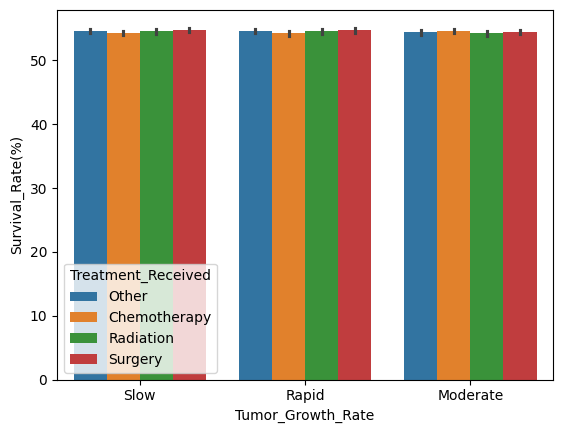

In [9]:
sns.barplot(x="Tumor_Growth_Rate", y="Survival_Rate(%)", data=df, hue="Treatment_Received")
plt.show()

# This plot gives us Tumor-Location each Country 

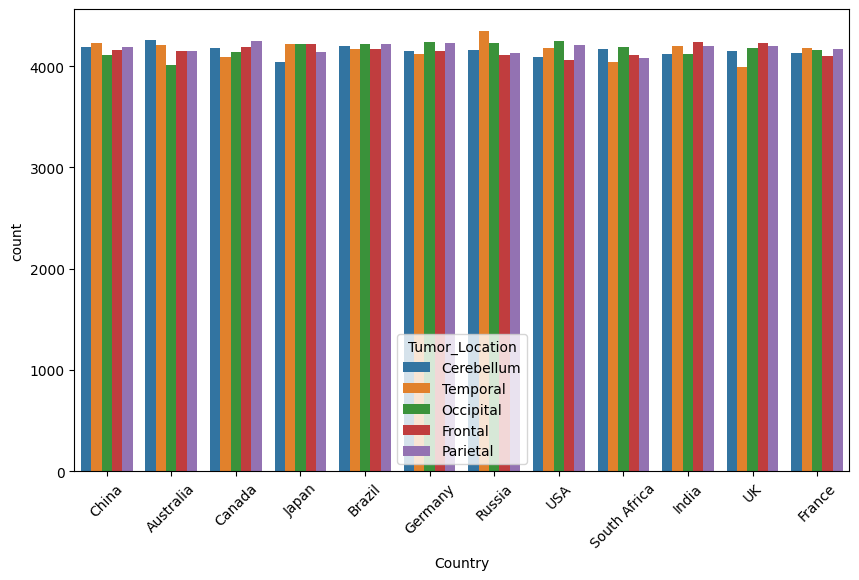

In [10]:
plt.figure(figsize=(10,6))
sns.countplot(x="Country", hue="Tumor_Location", data=df)
plt.xticks(rotation=45)  # If categories are long
plt.show()

# Plot histograms for each numerical feature

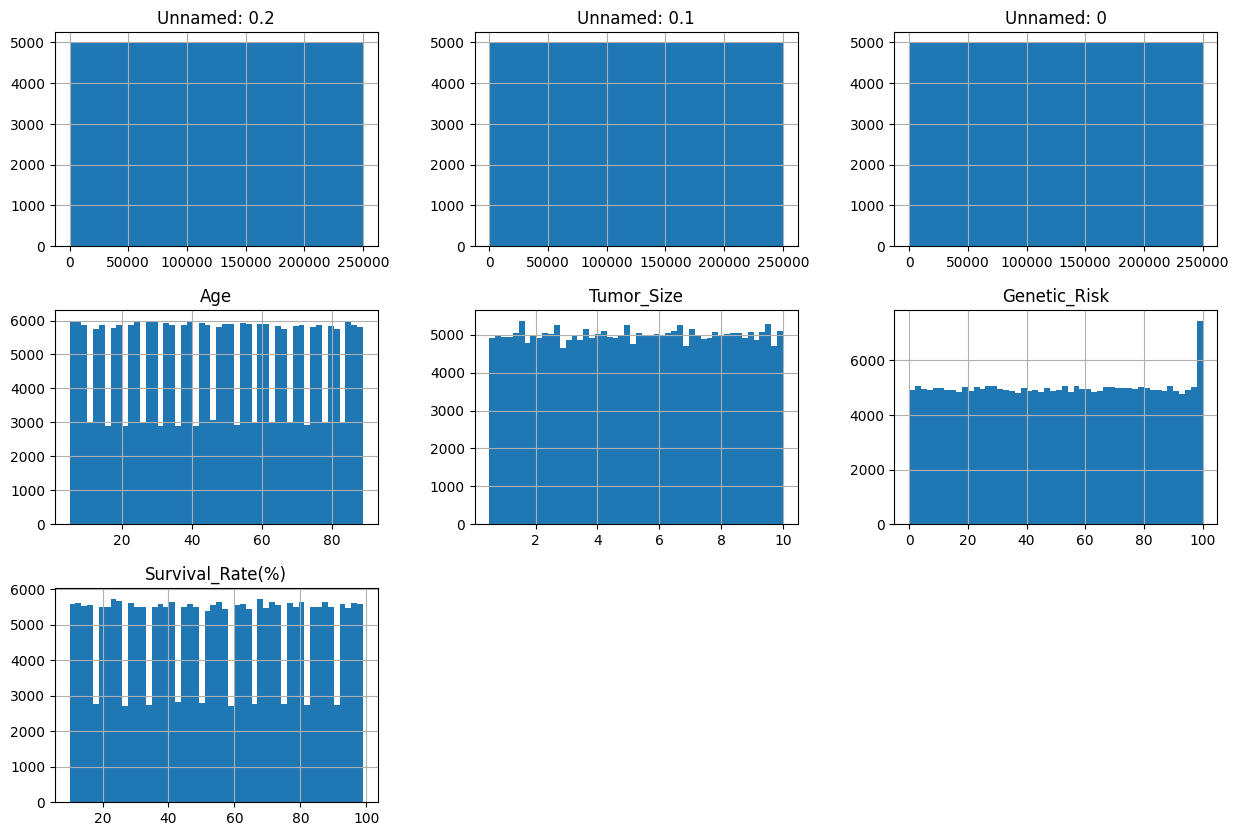

In [11]:
df.hist(bins=50,figsize=(15, 10))
plt.show()

# Create subplots for numerical feature distributions

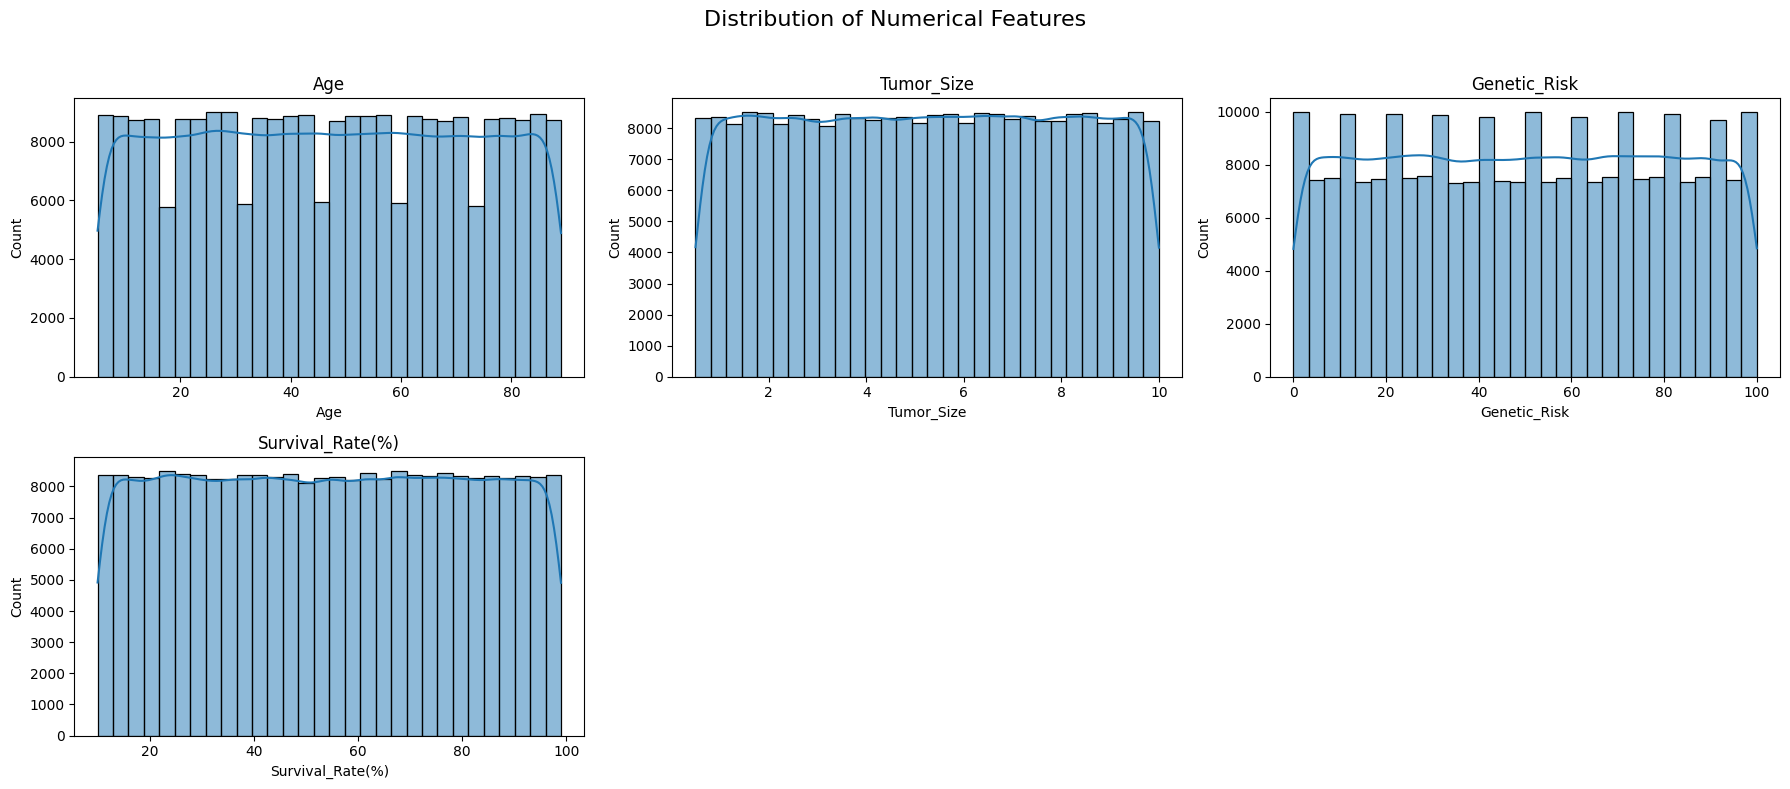

In [12]:
numerical_cols = ["Age", "Tumor_Size", "Genetic_Risk", "Survival_Rate(%)"]

# Replace infinite values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Create subplots
num_cols = len(numerical_cols)
rows = (num_cols // 3) + (num_cols % 3 > 0)  # Dynamically set rows based on number of columns

fig, axes = plt.subplots(nrows=rows, ncols=3, figsize=(18, 4 * rows))
fig.suptitle("Distribution of Numerical Features", fontsize=16)
axes = axes.flatten()

# Plot histograms
for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(col)

# Hide unused subplots
for i in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# # Define numerical and categorical columns

In [13]:
sns.set(style="whitegrid")

numerical_cols = ["Unnamed: 0",	"Age", "Tumor_Size", "Genetic_Risk", "Survival_Rate(%)"]
categorical_cols = ["Gender", "Country", "Tumor_Location","MRI_Findings", "Smoking_History", "Alcohol_Consumption","Chroni_Illness",
                   "Diabetes","Treatment-Received", "Tumor_Growth_Rate", "Family_History","Symptom_Severity", "Brain_Tumor_Present"] 

# Count Plots for Categorical Features

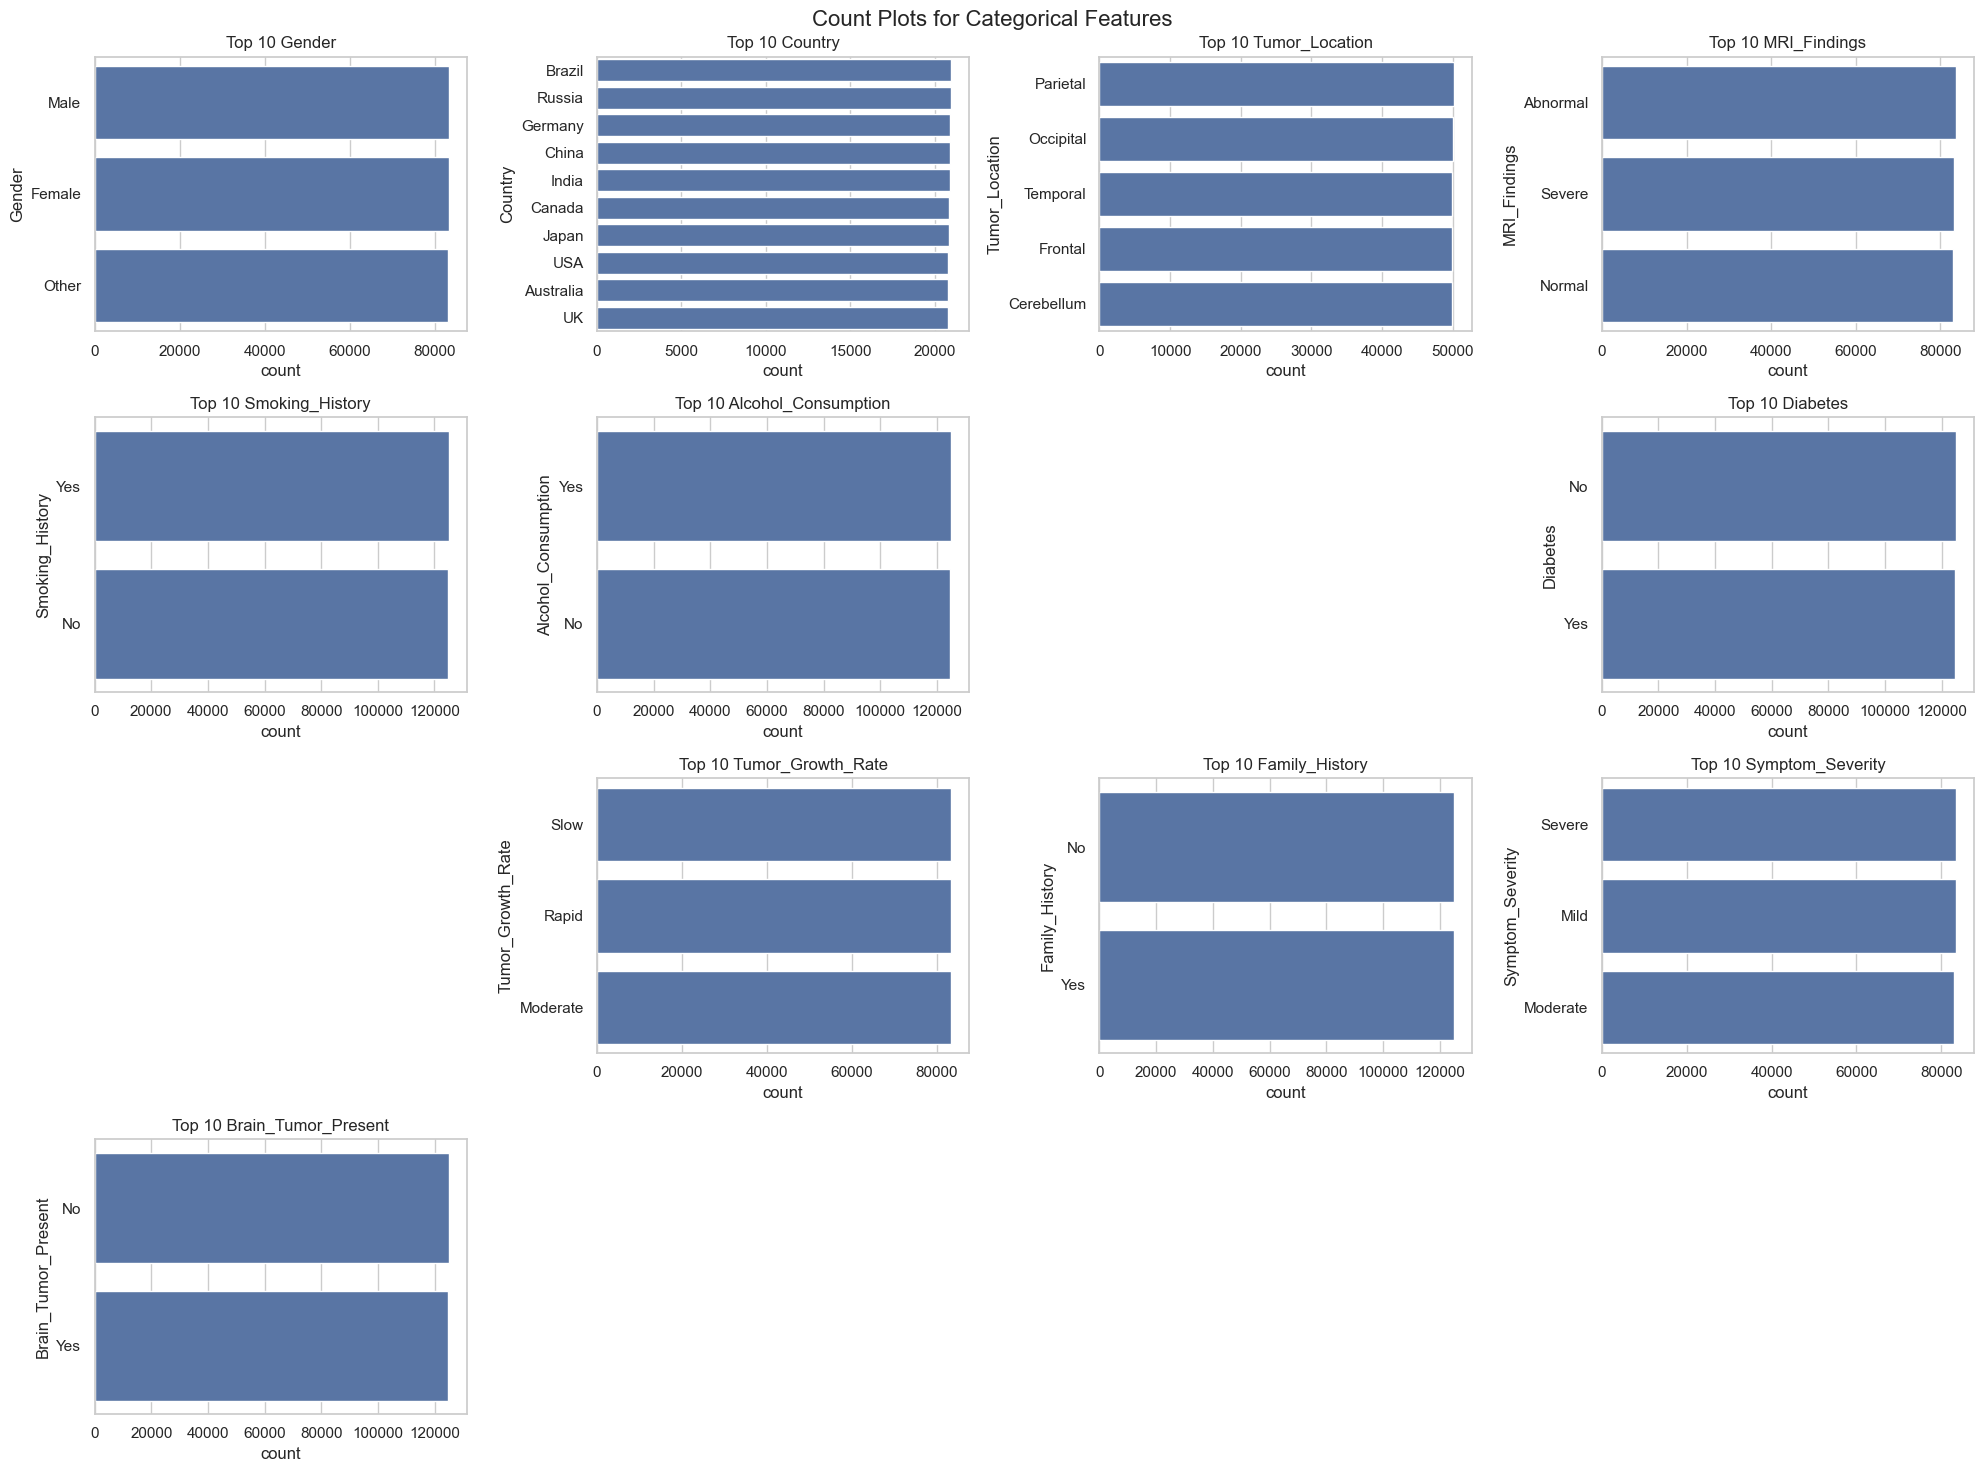

In [14]:

# Set up the number of rows/columns dynamically
n_cols = 4  # Columns per row
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols  # Calculate needed rows

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15))
fig.suptitle("Count Plots for Categorical Features", fontsize=16)

# Flatten axes array to avoid indexing issues
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    if col in df.columns:  # Check if column exists in df
        sns.countplot(y=df[col], order=df[col].value_counts().index[:10], ax=axes[i])
        axes[i].set_title(f"Top 10 {col}")
    else:
        axes[i].axis("off")  # Hide empty subplots

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()


# Generate Boxplots for Outlier Detection

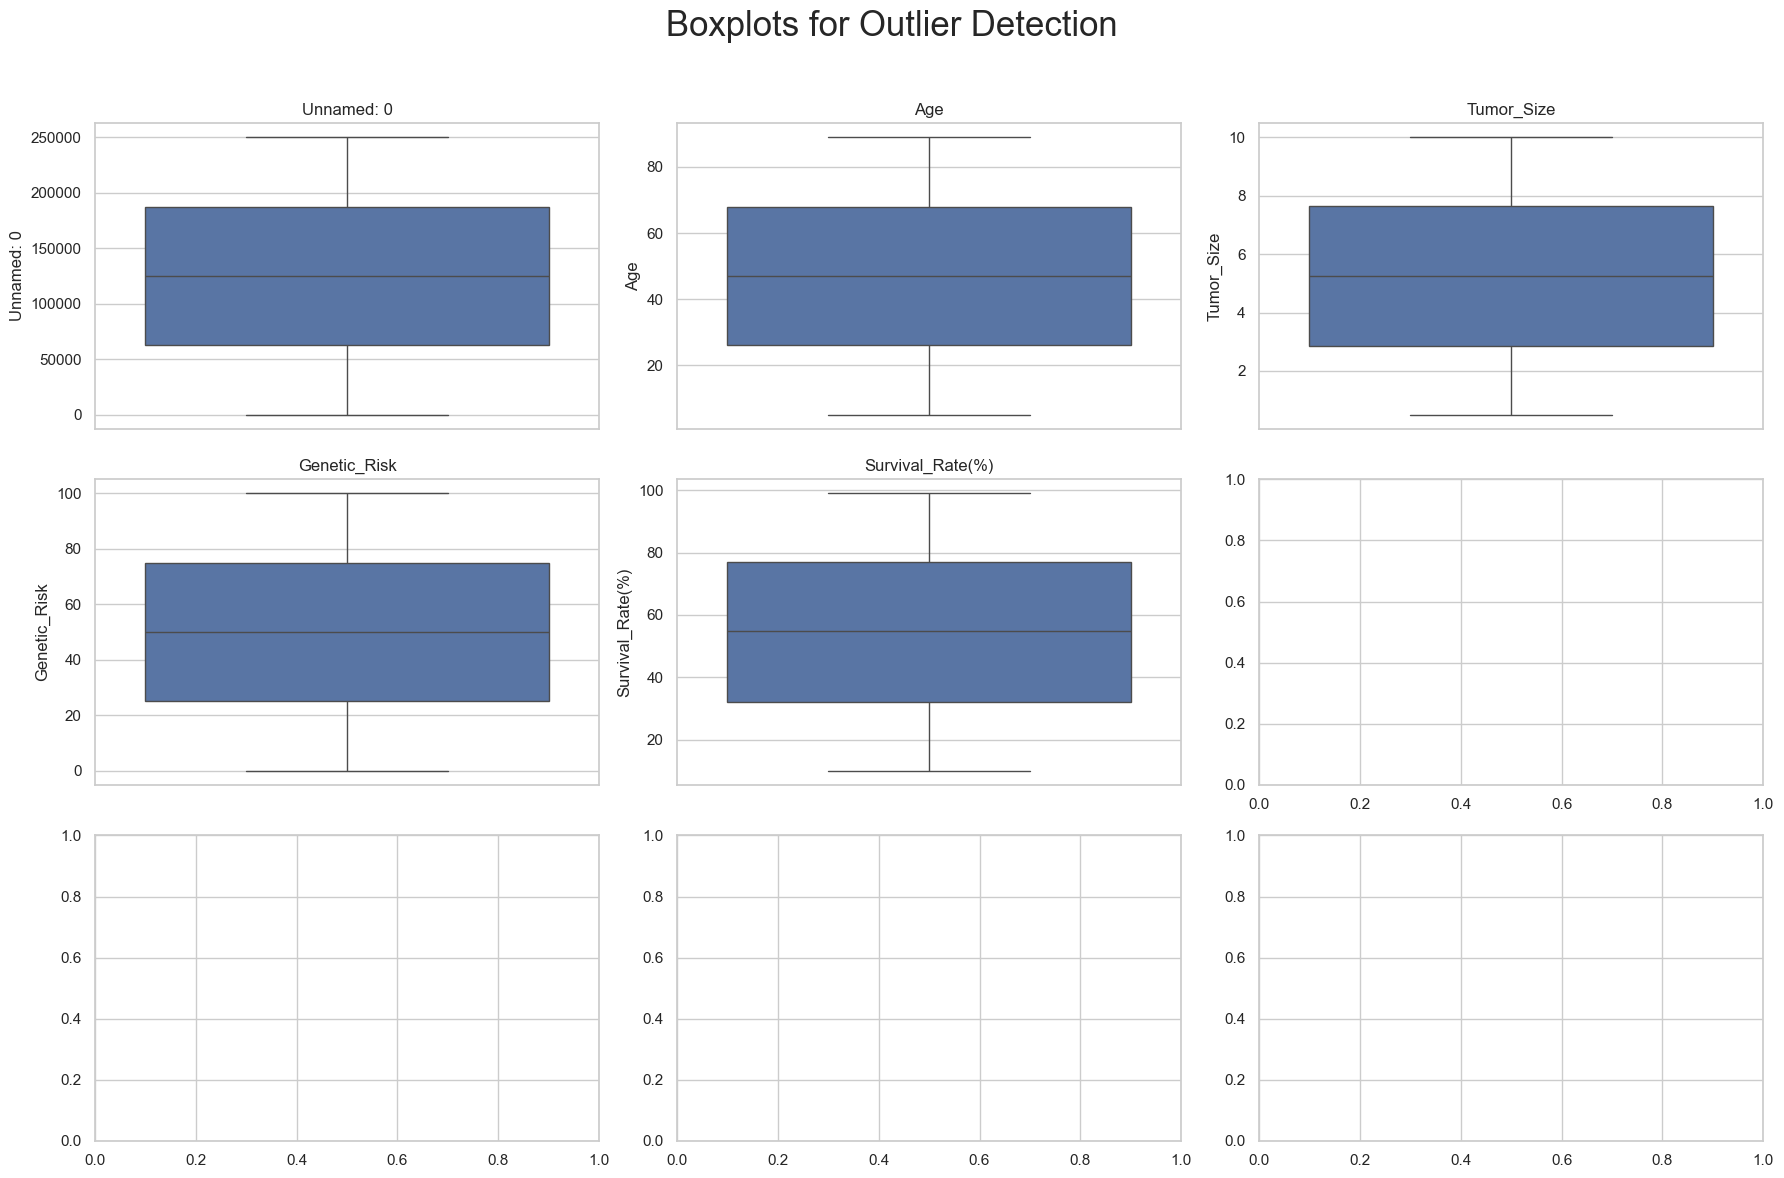

In [15]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
fig.suptitle("Boxplots for Outlier Detection", fontsize=25)
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()